In [3]:
import numpy as np
from collections import Counter

from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [2]:
# https://www.youtube.com/watch?v=rTEtEy5o3X0

class KNN:
    def __init__(self, k=3):
        self.k = k

    def euclideanDistance(self, v1, v2):
        return np.sqrt(np.sum((v1-v2)**2))

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return [self._predict(x) for x in X]

    def _predict(self, x):
        # coumpute the distance
        distances = [self.euclideanDistance(x, x_train) for x_train in self.X_train]

        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]


In [4]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

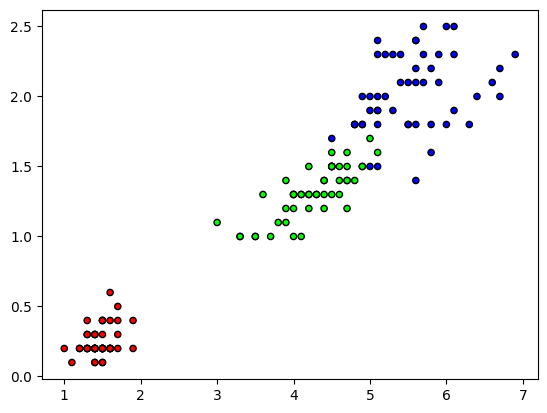

In [7]:
plt.figure()
plt.scatter(X[:,2], X[:,3], c=y, cmap=cmap, edgecolors='k', s=20)
plt.show()

In [9]:
clf = KNN(k=5)
clf.fit(X_train, y_train)

In [11]:
predictions = clf.predict(X_test)
print(predictions)

[np.int64(1), np.int64(2), np.int64(2), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(2), np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(0), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(1), np.int64(2), np.int64(0)]


In [12]:
def accuracy(y_pred, y_true):
    return np.sum(y_pred==y_true)/len(y_true)

In [13]:
print(accuracy(predictions, y_test))

0.9666666666666667
